#No code selection of friction surface by LGA

In [ ]:
# @title Import libraries
# install arcgis API for accessing data
!pip install arcgis

from arcgis.gis import GIS
from arcgis.features import FeatureLayer
from arcgis.geometry.filters import contains
import json
import arcgis
import matplotlib.pyplot as plt

import pandas as pd
import geopandas as gpd

import zipfile
import os

from ipywidgets import Dropdown
from IPython.display import display

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 738.5/738.5 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 2.3 MB/s eta 0:00:00
  Created wheel for pylerc: filename=pylerc-4.0-py3-none-any.whl size=738090 sha256=c2626ec4e84bae3879d594e533600b5308986f285544947fcf89d1bfa733e8dd
  Stored in directory: /root/.cache/pip/wheels/fa/44/c1/dee493b5ef79483d0276093205256ae13c97009c847e54c580
Successfully built pylerc
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uni

In [ ]:
# @title Select State
# Import and select statename
# Anonymously authenticate arcgis API
gis = GIS()
# Read in service for NGA roads
layer_url = "https://services3.arcgis.com/BU6Aadhn6tbBEdyk/arcgis/rest/services/NGA_State_Boundaries_V2/FeatureServer/0"
feature_layer = FeatureLayer(layer_url)

# Convert to feature set and subset by bounding box
feat = feature_layer.query()

# Convert to geojson
geojson_data = json.loads(feat.to_geojson)

# Convert to geodataframe
state = gpd.GeoDataFrame.from_features(geojson_data['features'], crs="epsg:4326")

unique_states = state['statename'].unique()

# Read in service for NGA roads
layer_url = "https://services3.arcgis.com/BU6Aadhn6tbBEdyk/arcgis/rest/services/NGA_LGA_Boundaries_2/FeatureServer/0"
feature_layer = FeatureLayer(layer_url)

# Convert to feature set and subset by bounding box
feat = feature_layer.query()

# Convert to geojson
geojson_data = json.loads(feat.to_geojson)

# Convert to geodataframe
lga = gpd.GeoDataFrame.from_features(geojson_data['features'], crs="epsg:4326")

# If lga name has / replace with _
lga.lganame = lga.lganame.str.replace('/', '_')

unique_lga = lga['lganame'].unique()

state_dropdown = Dropdown(options=unique_states, description='Select State:')

display(state_dropdown)

current_selected_state = None

def handle_dropdown_change(change):
    global current_selected_state
    if change['type'] == 'change' and change['name'] == 'value':
        current_selected_state = change['new']

def get_lgas_in_state(state_name):
    lgas_in_state = lga[lga['statename'] == state_name]
    return sorted(lgas_in_state['lganame'].unique().tolist())

# Test the function with the current selected state
if 'current_selected_state' in locals() and current_selected_state:
    filtered_lgas = get_lgas_in_state(current_selected_state)

state_dropdown.observe(handle_dropdown_change)

Dropdown(description='Select State:', options=('Cross River', 'Fct', 'Ogun', 'Oyo', 'Sokoto', 'Zamfara', 'Lago…

In [ ]:
# @title Select LGA using State Selection
# Select LGA matching state name
initial_lga_options = []

if 'current_selected_state' in locals() and current_selected_state:
    initial_lga_options = get_lgas_in_state(current_selected_state)

lga_dropdown = Dropdown(options=initial_lga_options, description='Select LGA:')
display(lga_dropdown)

current_selected_lga = lga_dropdown.value

def handle_lga_dropdown_change(change):
    global current_selected_lga
    if change['type'] == 'change' and change['name'] == 'value':
        current_selected_lga = change['new']

lga_dropdown.observe(handle_lga_dropdown_change)

Dropdown(description='Select LGA:', options=('Adavi', 'Ajaokuta', 'Ankpa', 'Bassa', 'Dekina', 'Ibaji', 'Idah',…

In [ ]:
# @title Choose friction surface type to download
from ipywidgets import Dropdown
from IPython.display import display

# Define the dropdown options
friction_surface_options = {
    "Walking-based friction surface": "1RhpIj3p77qpfpKVby8_UAqLn3JSt7dV0",
    "Mixed friction surface": "1LyYkag3SKB8vop3cksuPcu66wzzCOlvm"
}

# Create the dropdown widget
friction_dropdown = Dropdown(
    options=friction_surface_options,
    value=friction_surface_options["Mixed friction surface"], # Default value
    description='Select Friction Surface:'
)

# Initialize the variable to store the selected friction type
selected_friction_type = friction_dropdown.value

def on_friction_dropdown_change(change):
    global selected_friction_type
    if change['type'] == 'change' and change['name'] == 'value':
        selected_friction_type = change['new']

# Observe changes in the dropdown
friction_dropdown.observe(on_friction_dropdown_change)

# Display the dropdown
display(friction_dropdown)


Dropdown(description='Select Friction Surface:', index=1, options={'Walking-based friction surface': '1RhpIj3p…

In [ ]:
# @title Download friction surface into temporary drive files - only needs to be run once per runtime


# Download and extract friction surface

# Download raster
file_id = selected_friction_type
!gdown --id {file_id}


# Get correct file name for walking and mixed
if selected_friction_type == "1LyYkag3SKB8vop3cksuPcu66wzzCOlvm":
  zip_file_name = 'GRID3_NGA_mix_travel_time_friction_surface_v1_0.zip'
if selected_friction_type == "1RhpIj3p77qpfpKVby8_UAqLn3JSt7dV0":
  zip_file_name = 'GRID3_NGA_walk_travel_time_friction_surface_v1_0.zip'

# Specify the directory where you want to extract the files
extraction_path = '/content/extracted_data'
os.makedirs(extraction_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

print(f"Files extracted to: {extraction_path}")
print("Contents of extracted directory:", os.listdir(extraction_path))

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:139: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1LyYkag3SKB8vop3cksuPcu66wzzCOlvm
From (redirected): https://drive.google.com/uc?id=1LyYkag3SKB8vop3cksuPcu66wzzCOlvm&confirm=t&uuid=d2afa603-a82f-4147-95e6-df8f21eb865d
To: /content/GRID3_NGA_mix_travel_time_friction_surface_v1_0.zip
100% 3.22G/3.22G [00:46<00:00, 70.0MB/s]
Files extracted to: /content/extracted_data
Contents of extracted directory: ['GRID3_NGA_mix_travel_time_friction_surface_v1_0']


Clipped friction surface successfully written to: /content/clipped_friction_surface_Ogori_Magongo_Kogi.tif


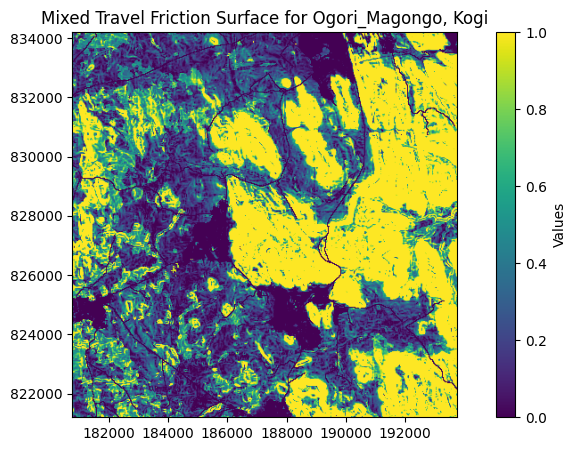

In [ ]:
# @title Map friction surface for LGA
if current_selected_lga:
    # Subset the GeoDataFrame for the selected state
    selected_lga_gdf = lga[lga['lganame'] == current_selected_lga]

    # Get the bounding box of the selected state
    # The .total_bounds property returns a tuple (minx, miny, maxx, maxy)
    bbox = selected_lga_gdf.total_bounds
from pyproj import Transformer

# Define input and output CRS
transformer = Transformer.from_crs("EPSG:4326", "EPSG:32632", always_xy=True)

# Transform
bbox = transformer.transform_bounds(*bbox)

# Reshape bbox to be square
minx, miny, maxx, maxy = bbox
width = maxx - minx
height = maxy - miny

if width > height:
    diff = width - height
    miny -= diff / 2
    maxy += diff / 2
elif height > width:
    diff = height - width
    minx -= diff / 2
    maxx += diff / 2

bbox = (minx, miny, maxx, maxy)

import rasterio
from rasterio.windows import from_bounds
from rasterio.plot import show

def read_window_with_bounds(input_raster_path, bounds, t):
    minx, miny, maxx, maxy = bounds
    with rasterio.open(input_raster_path) as src:
        # Get the window corresponding to the bounds in the raster's CRS
        window = from_bounds(minx, miny, maxx, maxy, src.transform)

        # Read the data from that specific window
        clipped_data = src.read(1,window=window)

        transform=src.transform
        crs=src.crs
        profile = src.meta

        return clipped_data, crs, transform, profile, t


# Example Usage:
try:
  if selected_friction_type == "1LyYkag3SKB8vop3cksuPcu66wzzCOlvm":
    clipped_data, crs, transform, profile, t = read_window_with_bounds("/content/extracted_data/GRID3_NGA_mix_travel_time_friction_surface_v1_0/GRID3_NGA_mix_travel_time_friction_surface_v1_0.tif", bbox, 1)
except:
  print('Mixed friction surface has not been extracted, rerun previous code block')

try:
  if selected_friction_type == "1RhpIj3p77qpfpKVby8_UAqLn3JSt7dV0":
    clipped_data, crs, transform, profile, t = read_window_with_bounds("/content/extracted_data/GRID3_NGA_walk_travel_time_friction_surface_v1_0.tif/GRID3_NGA_walk_travel_time_friction_surface_v1_0.tif", bbox, 2)
except:
  print('Walking friction surface has not been extracted, rerun previous code block')

import rasterio.transform

# Output numpy array to raster with original CRS
# Define the output path for the GeoTIFF
name = "clipped_friction_surface_"+ current_selected_lga + "_" + current_selected_state
output_geotiff_path = '/content/'+name+'.tif'

# Update the profile dictionary with the correct dimensions and transform for clipped_data
updated_profile = profile.copy()
updated_profile['height'] = clipped_data.shape[0]
updated_profile['width'] = clipped_data.shape[1]

# Recalculate the transform for the clipped data
# bbox[0] is minx, bbox[3] is maxy (top-left y coordinate)
# abs(transform.a) is x resolution, abs(transform.e) is y resolution
updated_profile['transform'] = rasterio.transform.from_origin(bbox[0], bbox[3], abs(transform.a), abs(transform.e))
updated_profile['count'] = 1 # The clipped_data is a single band (2D array)

# Write the clipped_data NumPy array to a new GeoTIFF file
try:
    with rasterio.open(output_geotiff_path, 'w', **updated_profile) as dst:
        dst.write(clipped_data, 1) # Write to the first band
    print(f"Clipped friction surface successfully written to: {output_geotiff_path}")
except Exception as e:
    print(f"Error writing GeoTIFF: {e}")

# Read in clipped raster and plot
with rasterio.open(output_geotiff_path) as src:
        if t == 1:
          title = "Mixed Travel Friction Surface for" + " " + current_selected_lga + ", " + current_selected_state

        if t == 2:
          title = "Walking Travel Friction Surface for" + " " + current_selected_lga + ", " + current_selected_state

        fig, ax = plt.subplots(figsize=(10, 5))

        image = show(src, transform=transform, cmap='viridis', ax=ax, percent_range=(10, 70))

        fig.colorbar(ax.get_images()[0], ax=ax, label='Values')
        plt.title(title)
        plt.show()




In [ ]:
# @title Download clipped friction surface locally
from google.colab import files

try:
    files.download(output_geotiff_path)
    print(f"'{output_geotiff_path}' downloaded successfully.")
except Exception as e:
    print(f"Error downloading file: {e}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'/content/clipped_friction_surface_Ogori_Magongo_Kogi.tif' downloaded successfully.
